In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("headbrain.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [18]:
df.shape
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


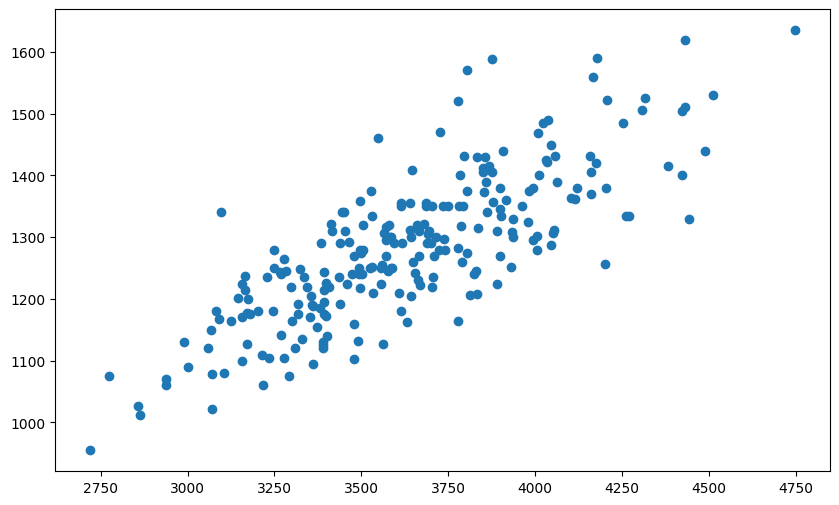

In [19]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

In [20]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [21]:
numer = 0
denom = 0
n = len(x)

for i in range(n):
  numer += (y[i] -mean_y) * (x[i] - mean_x)
  denom += (x[i] - mean_x) ** 2

slope = numer / denom
intercept = mean_y - (slope * mean_x)

print("Slope:",slope)
print("Intercept:",intercept)

Slope: 0.26342933948939945
Intercept: 325.57342104944223


In [22]:
predictions = []
for i in range(n):
  y_pred = slope * x[i] + intercept
  predictions.append(int(y_pred))

print(predictions[:5])

[1514, 1310, 1448, 1320, 1425]


In [23]:
# Actual Values
print(y[:5])

[1530 1297 1335 1282 1590]


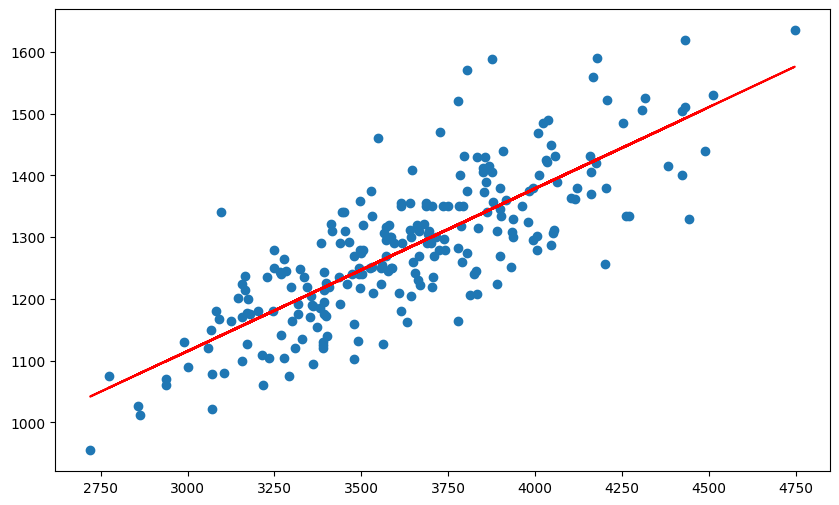

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x, predictions, 'r')
plt.show()

In [25]:
# MSE - Mean Squared Error
error = 0
for i in range(n):
  error += (predictions[i] - y[i]) ** 2

mse = error/n
print("MSE:",mse)

MSE: 5202.9029535864975


In [26]:
# RMSE
np.sqrt(mse)

np.float64(72.13115106239812)

In [27]:
# Gradient Descent Based Slope and intercept


In [28]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x.shape


(237,)

In [29]:

x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))

In [30]:
x.shape

(237, 1)

In [31]:
minmax = MinMaxScaler()
scale_x = minmax.fit_transform(x)
scale_y = minmax.fit_transform(y)

print(scale_x[:5])

[[0.88406512]
 [0.50222003]
 [0.7602368 ]
 [0.52146029]
 [0.71879625]]


In [32]:
def gradientDescent(epochs,alpha):
  slope, inter =0,0
  for i in range(epochs):
    y_pred = slope * scale_x + inter # y = mx +c
    loss = y_pred - scale_y
    gradSlope = (2/n) * np.dot(loss.T, scale_x)
    gradInter = (2/n) * np.sum(loss)
    slope = slope - gradSlope * alpha
    inter = inter - gradInter * alpha
  return slope, inter

In [33]:
epochs = 100000
alpha = 0.01
slope, inter = gradientDescent(epochs, alpha)

In [34]:
print("New slope:",slope)
print("New Inter:",inter)

New slope: [[0.78525187]]
New Inter: 0.1280900359715273


In [35]:
predictions = []
for i in range(n):
  y_pred = slope[0][0] * scale_x[i] + inter
  predictions.append(int(y_pred))

/tmp/ipython-input-1211426029.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions.append(int(y_pred))


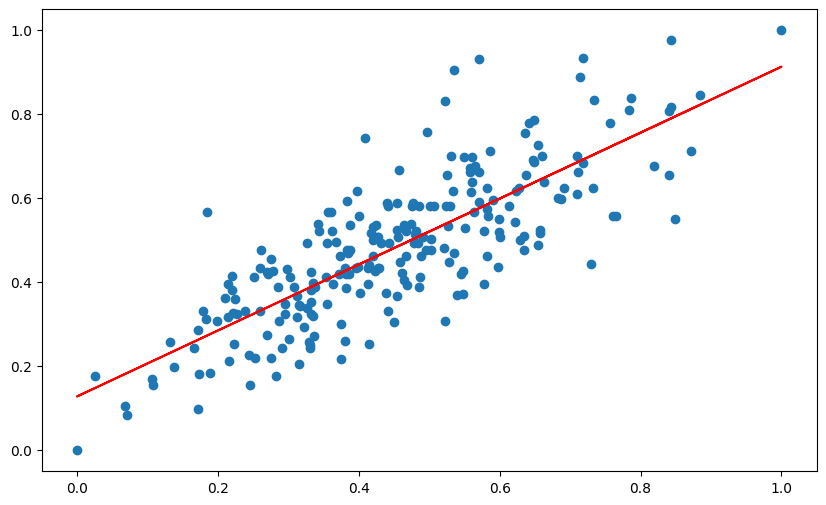

In [39]:
predictions = slope * scale_x + inter
plt.figure(figsize=(10,6))
plt.scatter(scale_x,scale_y)
plt.plot(scale_x, predictions, 'r')
plt.show()